Retrieve movie metadata and frames using both [pycamhd-lazyqt](https://github.com/CamHD-Analysis/pycamhd-lazyqt) and [pycamhd-lazycache](https://github.com/CamHD-Analysis/pycamhd-lazycache) accessors.

In [1]:
import pycamhd.pycamhd as pyc

import pycamhd.lazycache as lazycache
import pycamhd.lazyqt as lazyqt

from os import path



%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# remote file
filename = '/RS03ASHS/PN03B/06-CAMHDA301/2016/11/13/CAMHDA301-20161113T000000Z.mov'
local_filename = '/RS03ASHS/PN03B/06-CAMHDA301/2016/03/03/CAMHDA301-20160303T000000Z.mov'

## `pycamhd.lazycache` talking to an instance of `lazycache` running on Google App Engine

Processing is handled by Lazycache server (running somewhere else --- in this case, a Google App Engine instance).   Communicates with Lazycache using it's HTTP API.

In [3]:
repo = lazycache.lazycache()  # Use default lazycache instance (Google App Engine)

In [4]:
%%time 
meta = repo.get_metadata( filename )
print(meta)

{'URL': '/RS03ASHS/PN03B/06-CAMHDA301/2016/11/13/CAMHDA301-20161113T000000Z.mov', 'NumFrames': 25169, 'Duration': 839.8056, 'FileSize': 14599430881}
CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 1.03 s


In [5]:
%%time
frame = repo.get_frame( filename, 5000 )
print(frame.shape)

(1080, 1920, 3)
CPU times: user 172 ms, sys: 28 ms, total: 200 ms
Wall time: 1.43 s


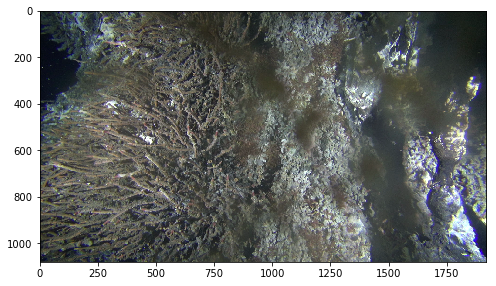

In [6]:
plt.rc('figure', figsize=(8, 8))
imgplot = plt.imshow(frame)

## `pycamhd.lazycache` talking to local instance of `lazycache`


In [7]:
repo = lazycache.lazycache('http://localhost:8080/v1/org/oceanobservatories/rawdata/files/')  # Use default lazycache instance (Google App Engine)

### This  file _is not_ located locally on Berna

In [8]:
%%time 
meta = repo.get_metadata( filename )
print(meta)

{'URL': '/RS03ASHS/PN03B/06-CAMHDA301/2016/11/13/CAMHDA301-20161113T000000Z.mov', 'NumFrames': 25169, 'Duration': 839.8056, 'FileSize': 14599430881}
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 190 ms


In [9]:
%%time
frame = repo.get_frame( filename, 5000 )
print(frame.shape)

(1080, 1920, 3)
CPU times: user 96 ms, sys: 16 ms, total: 112 ms
Wall time: 513 ms


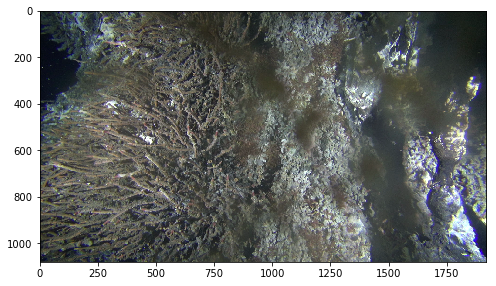

In [10]:
plt.rc('figure', figsize=(8, 8))
imgplot = plt.imshow(frame)

In [29]:
### This file _is_ located locally on Berna

In [23]:
%%time 
meta = repo.get_metadata( local_filename )
print(meta)

{'duration': 840.3394775390625, 'num_frames': 25185, 'valid': True}
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 190 ms


In [24]:
%%time
frame = repo.get_frame( local_filename, 5000 )
print(frame.shape)

(1080, 1920, 4)
CPU times: user 76 ms, sys: 4 ms, total: 80 ms
Wall time: 319 ms


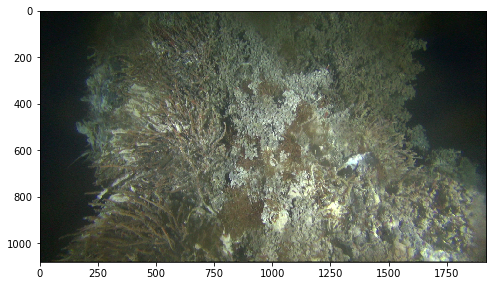

In [25]:
plt.rc('figure', figsize=(8, 8))
imgplot = plt.imshow(frame)

## `pycamhd.lazyqt`

Video information is efficiently retrieved from Rutgers, processing is done locally (in Go, through a Cython interface).


In [26]:
repo = lazyqt.repo()   ## Use default raw data repository (Rutgers CI)

In [27]:
%%time 
meta = repo.get_metadata( filename )
print(meta)

{'duration': 839.8056030273438, 'num_frames': 25169, 'valid': True}
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 190 ms


In [28]:
%%time
frame = repo.get_frame( filename, 5000 )
print(frame.shape)

(1080, 1920, 4)
CPU times: user 76 ms, sys: 12 ms, total: 88 ms
Wall time: 323 ms


## `pycamhd`


In [18]:
file_in_data = "/data/%s" % path.basename(local_filename)

In [19]:
%%time
frame = pyc.get_frame(file_in_data,5000)
print(frame.shape)

(1080, 1920, 3)
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 37.5 ms


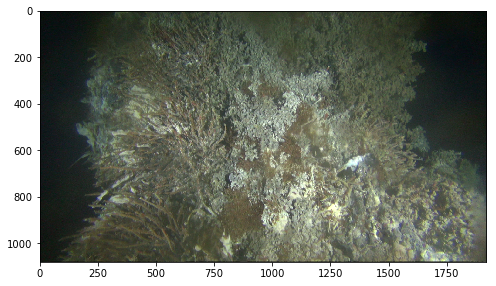

In [20]:
plt.rc('figure', figsize=(8, 8))
imgplot = plt.imshow(frame)